## Library importing

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
import re

##Data Pre-processing

In [54]:
df = pd.read_csv('/content/sample_data/train_set.csv')

df.head()

,New_ID,Text,Sentiment,Party
0,35027,#απολυμανση_κοριοι #απεντομωση_κοριος #απολυμα...,NEUTRAL,SYRIZA
1,9531,Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη...,NEGATIVE,ND
2,14146,"Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στου...",POSITIVE,KKE
3,28716,@five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25...,NEUTRAL,KKE
4,32886,@ai_katerina Αυτό που είναι συγκλονιστικό είνα...,NEUTRAL,SYRIZA


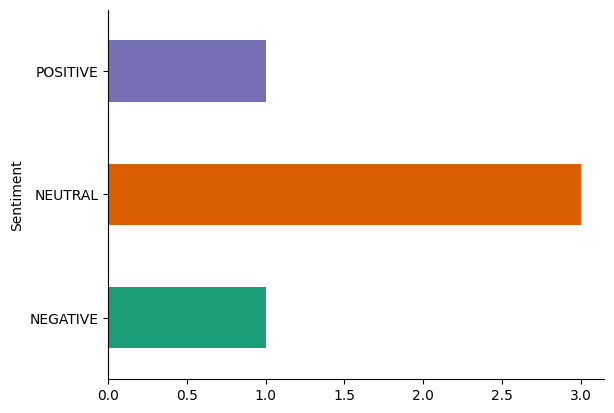

In [22]:
# Visualize our data (specifically the Sentiment column)
# Data Distribution
_df_2.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Sentiment', ylabel='count'>

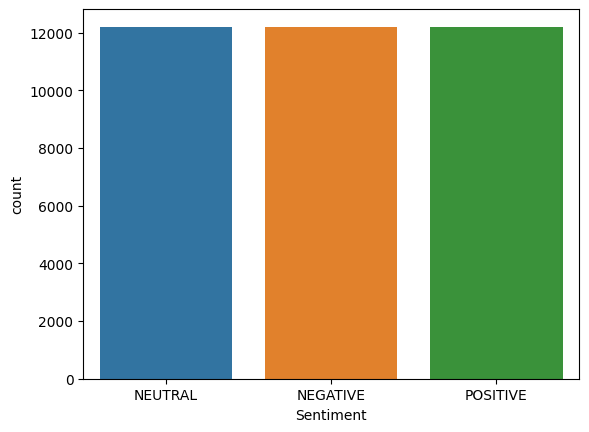

In [25]:
# Countplot for column Sentiment
sns.countplot(x='Sentiment',data=df)

In [14]:
# Check for null values
df.isnull().sum()

New_ID       0
Text         0
Sentiment    0
Party        0
dtype: int64

In [55]:
# Data cleanup
# Remove all useless characters from tweets (URLs, Hashtags, mentions (at signs), punctuations)
def clean_tweet(tweet):
    '''
    Function to clean a tweet text by removing the links, punctuations, hashtags, and mentions symbols
    using regex expressions.
    Parameters:
       tweet (string): Tweet text to transform.
    Returns:
       tweet_cleaned (string): Tweet without links, punctuations, hashtags, and mentions symbols.
    """
    '''
    # convert the tweet text to lowercase letters
    tweet_lower = tweet.lower()
    # remove links, punctuations, hashtags, and mentions
    tweet_cleaned = re.sub(u"(http\S+)|([“”!?])|([#@])", "", tweet_lower)

    return tweet_cleaned

# Apply function to all tweets (text column)
df['Text'] = [clean_tweet(tweet) for tweet in df['Text']]
# df['Text'] = [tweet.split("@")[0] for tweet in df['Text']]
print('text', df['Text'])

text 0        απολυμανση_κοριοι απεντομωση_κοριος απολυμανσε...
1        έξι νέες επιστολές για τη μακεδονία «καίνε» τη...
2        ισχυρό κκε, δύναμη του λαού στη βουλή και στου...
3        five2nds anthi7vas μνημονιακότατο το μερα25  ε...
4        ai_katerina αυτό που είναι συγκλονιστικό είναι...
                               ...                        
36625    kourtakisjohn kmitsotakis ο κούλης ο μητσοτάκη...
36626    enikos_gr nchatzinikolaou adonisgeorgiadi πρόσ...
36627    η θέση του κκε για την ασφάλεια των πολιτών κα...
36628    thanosplevris μαρη κακομοίρα θυγατέρα του ναζι...
36629    gijjstalking spirosr76 εντάξει με έπεισες και ...
Name: Text, Length: 36630, dtype: object


In [56]:
X = df['Text'] # feature
y = df['Sentiment'] # label

print('X is:', X)

# Apply cross validation for our model
# 80% training data 20% test data is optimal for our case.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# use Count Vectorizer to make text into vectors
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#Stop words
gr_stop_words = []

X is: 0        απολυμανση_κοριοι απεντομωση_κοριος απολυμανσε...
1        έξι νέες επιστολές για τη μακεδονία «καίνε» τη...
2        ισχυρό κκε, δύναμη του λαού στη βουλή και στου...
3        five2nds anthi7vas μνημονιακότατο το μερα25  ε...
4        ai_katerina αυτό που είναι συγκλονιστικό είναι...
                               ...                        
36625    kourtakisjohn kmitsotakis ο κούλης ο μητσοτάκη...
36626    enikos_gr nchatzinikolaou adonisgeorgiadi πρόσ...
36627    η θέση του κκε για την ασφάλεια των πολιτών κα...
36628    thanosplevris μαρη κακομοίρα θυγατέρα του ναζι...
36629    gijjstalking spirosr76 εντάξει με έπεισες και ...
Name: Text, Length: 36630, dtype: object


# Model training

In [57]:
# create and train our Logistic Regression model
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)

# add predictions to list.
predictions = lr_model.predict(X_test)

# Model evaluation and plots

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    NEGATIVE       0.38      0.39      0.38      2420
     NEUTRAL       0.38      0.38      0.38      2472
    POSITIVE       0.40      0.39      0.39      2434

    accuracy                           0.38      7326
   macro avg       0.38      0.38      0.38      7326
weighted avg       0.38      0.38      0.38      7326



In [39]:
print(accuracy_score(y_test,predictions))

0.38465738465738464
